# Heart rate and Breathing Rate from Photoplethysmography (PPG)

Our goal is to measure blood flow by measuring light reflection from the finger. The process is shown in the figure below. You hold the finger to the phone's camera with the LED turned on. The amplitude of the reflected light is  proportional to pulse pressure – the higher the peak, the stronger the pulse. 

<img src="figures/phone-ppg.jpg" width=500>

## PPG Example

An example of the PPG signal is shown below. This is a very clean example -- in practice, the PPG signal has baseline changes due to breathing and can be noisy due to leakage from ambient light. 

<img src="figures/ppg-signal.png" width=500>

## PPG Processing Pipeline

The PPG processing pipeline to extract heartrate and breathing rate is shown below. To extract heart rate, you take the higher frequency components and to extract breathing rate, you filter out the heart rate signal and take the lower frequency components.

<img src="figures/ppg-pipeline.png" width=900>

In this assignment, you will essentially follow the above pipeline and come up with an estimate for the heart rate and breathing rate in the time interval for which you have been provided the PPG signal.

In [348]:
import matplotlib
from matplotlib import cm
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

from scipy.signal import butter, freqz, filtfilt, firwin, iirnotch, lfilter, find_peaks

In [349]:
def pull_data(dir_name, file_name):
    f = open(dir_name + '/' + file_name + '.csv')
    x = []
    timestamps = []
    for line in f:
        value = line.split(',')
        if len(value) > 1:
            timestamps.append(float(value[-2]))
            p = float(value[-1])
            x.append(p)
    c = timestamps[0]
    timestamps[:] = [(y - c)/1000 for y in timestamps]
    return np.array(x), np.array(timestamps)
print(signal)

[240.76549739 241.07412304 241.55559228 240.91669421 240.93752066
 240.95314049 241.21485537 241.66114153 240.74585615 240.55939211
 240.66954408 240.75215806 240.31411855 239.73558891 239.80169168
 240.10126876 240.32595157 240.24446368 239.68334776 239.76251082
 239.82188311 240.11641234 240.33730925 239.50298194 239.37723645
 239.53292734 240.14969551 240.61227163 239.70920372 239.28190279
 239.21142709 239.65857032 240.24392774 240.93294581 240.19970935
 240.14978202 240.36233651 240.77175238 241.32881429 241.74661072
 240.80995804 240.60746853 240.4556014  241.09170105 241.56877579
 242.17658184 241.38243638 241.28682728 241.21512046 241.41134035
 241.80850526 242.10637895 241.07978421 240.80983816 240.60737862
 240.70553396 240.77915047 239.83436285 239.62577214 239.46932911
 239.85199683 240.13899762 239.35424822 239.26568616 239.19926462
 239.39944847 239.79958635 238.84968976 238.63726732 238.47795049
 238.85846287 239.14384715 238.35788536 238.26841402 238.45131052
 238.83848

## Part 1: Extracting Heart Rate from PPG

First, let us extract the heart rate signal from the data. The raw PPG signal has both the breathing and heartrate signal mixed together, so you need to find a way to separate these two signals to extract these values individually. Let us first look at how to extract heartrate from the PPG signal.

The heartrate signal corresponds to the small peaks that are continuously embedded in the signal. To extract the heartrate signal, you need to first subtract the baseline to get a clean periodic signal and then extract each individual heartbeat cycle.


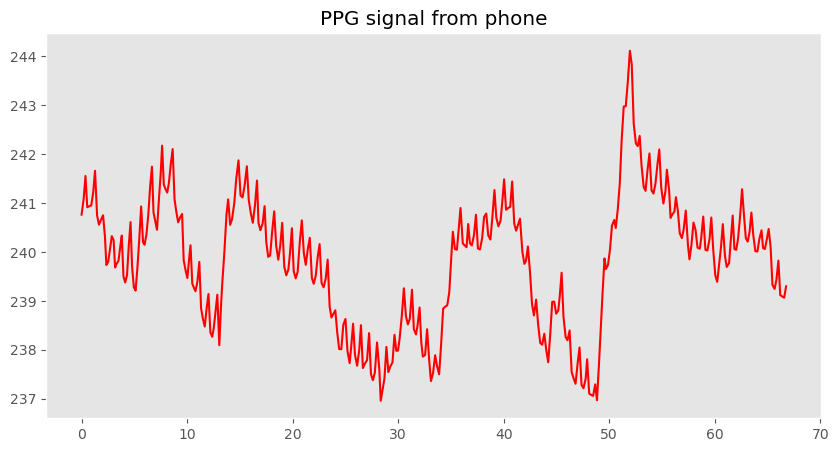

In [350]:
# read PPG data file
ppg_file = 'data/PPG'
signal, timestamps = pull_data(ppg_file, 'ppg_readings')
sampling_rate = len(timestamps)/max(timestamps)

plt.figure(figsize=(10,5))
plt.plot(timestamps, signal, 'r-',label='PPG')
plt.title("PPG signal from phone")
pl.grid()
pl.show()

**NOTE:** You have not been provided with exactly one minute of data, which means the heart rate and breathing rate in their standard units are not numerically equal to the number of heart beats or breaths detected in this interval. Take note of this in your calculations and in reporting your estimated results.

### 1.1 Extract Heart Rate signal via High-pass Filtering

**ASSIGNMENT:** Implement a high-pass filter to extract the heart rate signal from the noisy signal provided to you. For guidelines, you can refer to the implementation of the Butterworth filter in previous notebooks (recall that the Butterworth filter is actually a low-pass filter - you will have to modify your implementation accordingly). Set the cutoff frequency of the filter as appropriate. You can compare your resultant signal with the sample graph provided in the assignment instructions to tune the cutoff frequency.

Plot the original and high-pass filtered signals on the same graph for comparison.

In [351]:
# FILL IN CODE: Implement high-pass filter
# Define the cutoff frequency for the high-pass filter
cutoff_freq = 0.1  # Adjust this value as needed

# Design the high-pass filter
b, a = butter(8, cutoff_freq, 'low')

# Apply the filter to the signal
smoothed_signal = filtfilt(b, a, signal)


C:\Users\Default.DESKTOP-8HD5MR5\AppData\Local\Temp\ipykernel_12184\1640422747.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(timestamps, signal, 'r-',label='Original PPG', color='red')
C:\Users\Default.DESKTOP-8HD5MR5\AppData\Local\Temp\ipykernel_12184\1640422747.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(timestamps, smoothed_signal, 'r-',label='Smoothed PPG', color='blue')


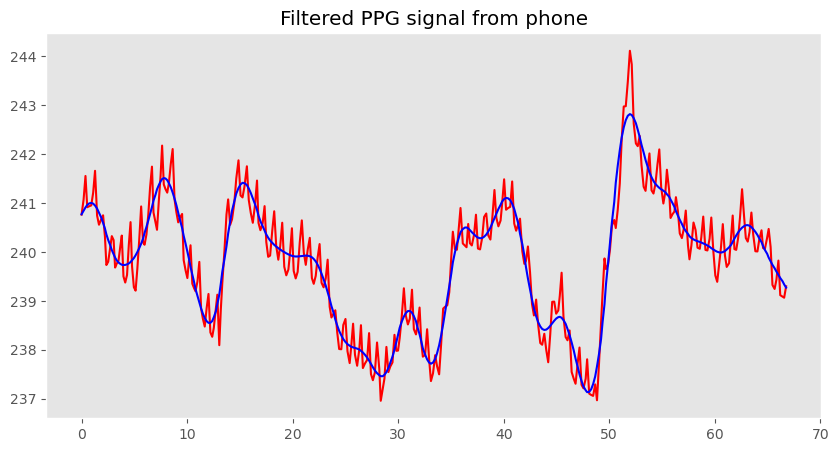

In [352]:
# FILL IN CODE: Plot the required signals
plt.figure(figsize=(10,5))
plt.plot(timestamps, signal, 'r-',label='Original PPG', color='red')
plt.plot(timestamps, smoothed_signal, 'r-',label='Smoothed PPG', color='blue')
plt.title("Filtered PPG signal from phone")
pl.grid()
pl.show()

### 1.2 Extract heart rate from the filtered signal

**ASSIGNMENT:** Use the highpass filtered signal from the previous step to estimate heart rate. You may try to apply algorithms similar to the step counting part of the assignment.

Plot your filtered signal and add markers at the points where your algorithm detects a heartbeat. Also print the estimated heartrate.

C:\Users\Default.DESKTOP-8HD5MR5\AppData\Local\Temp\ipykernel_12184\515880434.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(timestamps, smoothed_signal, 'r-',label='Smoothed PPG', color='blue')


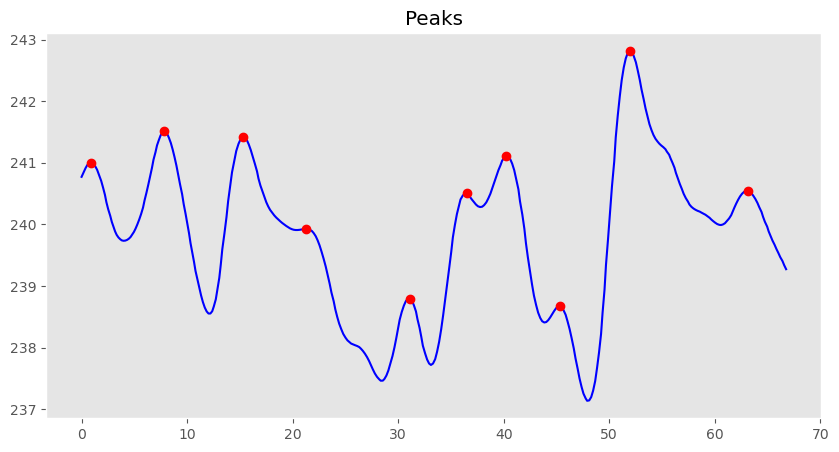

In [353]:
# FILL IN WITH CODE TO EXTRACT HEART RATE AND PLOT RESULTS
#Find Peaks
peaks, _ = find_peaks(smoothed_signal)

#Find average value
peak_values = smoothed_signal[peaks]
average_peak = np.mean(peak_values)

#Trim peak values
filtered_peaks = peaks[smoothed_signal[peaks] >= average_peak]

# Plot the data and peaks
plt.figure(figsize=(10,5))
plt.plot(timestamps, smoothed_signal, 'r-',label='Smoothed PPG', color='blue')
plt.plot(timestamps[peaks], smoothed_signal[peaks], 'ro', label='Peaks')
plt.title("Peaks")
pl.grid()
pl.show()

In [354]:
# Print estimated heart rate (in beats/minute, bpm)
#We are given a graph of 60 miliseconds
#There are 4 peaks in a heart beat
heart_rate = (len(peaks) * 14.2857142857) / 4
print(heart_rate)

35.714285714249996


## Part 2: Extract Breathing Rate from PPG

Extracting the breathing rate from the PPG signal is somewhat harder than extracting the heartrate since the peaks in the breathing signal are not always clearly visible. However, this information is indeed contained in the waveform. 

To extract the breathing signal, we follow three steps. 

<ol>
<li> First, we use a notch filter to remove frequencies near the heart rate that we just estimated. This is a targeted way of removing the heart rate signal.
<li> Second, we use a low-pass filter to extract only the baseline signal and remove residual heartrate signal. This baseline has the breathing signal (in the form of peaks) but it is often swamped by the changing baseline.  
<li> Third, you need to do peak detection to extract the breathing waveform. Note that since there is baseline wander, we cannot use zero crossings and instead have to rely on the local peaks.
</ol>

### 2.1 Use notch filter to remove heart rate signal

The notch filter removes the estimated heart rate (from above). Since the heart rate varies a little bit within the minute window, we use a low quality factor for the notch filter so that it removes a band of frequencies in the vicinity of the estimated heart rate.

**ASSIGNMENT:** Create and apply a notch filter (see previous notebooks for help) to remove the heart rate estimated above. Note that the filter requires a frequency in Hz, convert your heart rate estimate accordingly. Use a quality factor of 1.

C:\Users\Default.DESKTOP-8HD5MR5\AppData\Local\Temp\ipykernel_12184\597262349.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(timestamps, smoothed_signal, 'r-',label='Smoothed PPG', color='blue')


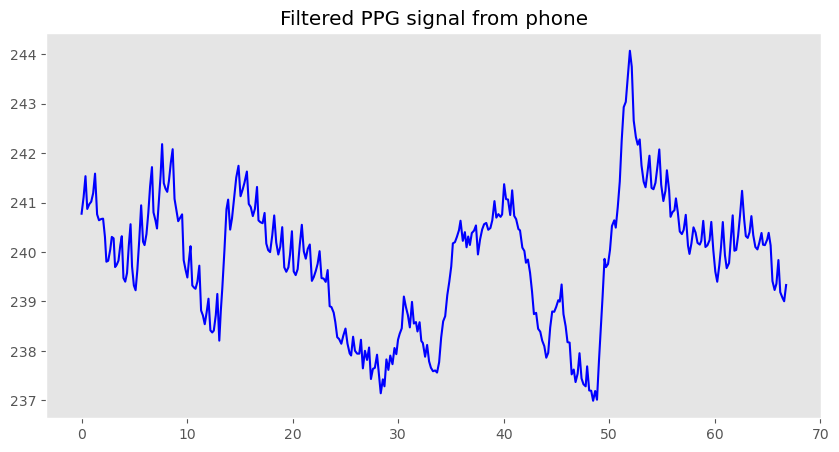

In [355]:
# FILL IN CODE to apply a notch filter.
# Define the notch frequency and bandwidth
fs = 1000  # Assuming a sampling frequency of 1000 Hz
f0 = 240.5  # Center frequency to filter out (in Hz)
Q = 10  # Quality factor (determines bandwidth)

# Design the notch filter
b, a = iirnotch(f0, Q, fs)

# Apply the notch filter to the signal
smoothed_signal = filtfilt(b, a, signal)

plt.figure(figsize=(10,5))
#plt.plot(timestamps, signal, 'r-',label='Original PPG', color='red')
plt.plot(timestamps, smoothed_signal, 'r-',label='Smoothed PPG', color='blue')
plt.title("Filtered PPG signal from phone")
pl.grid()
pl.show()

**ASSIGNMENT:** Plot the signal before and after application of notch filter on the same graph.

C:\Users\Default.DESKTOP-8HD5MR5\AppData\Local\Temp\ipykernel_12184\2720045380.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(timestamps, signal, 'r-',label='Original PPG', color='red')
C:\Users\Default.DESKTOP-8HD5MR5\AppData\Local\Temp\ipykernel_12184\2720045380.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(timestamps, smoothed_signal, 'r-',label='Smoothed PPG', color='blue')


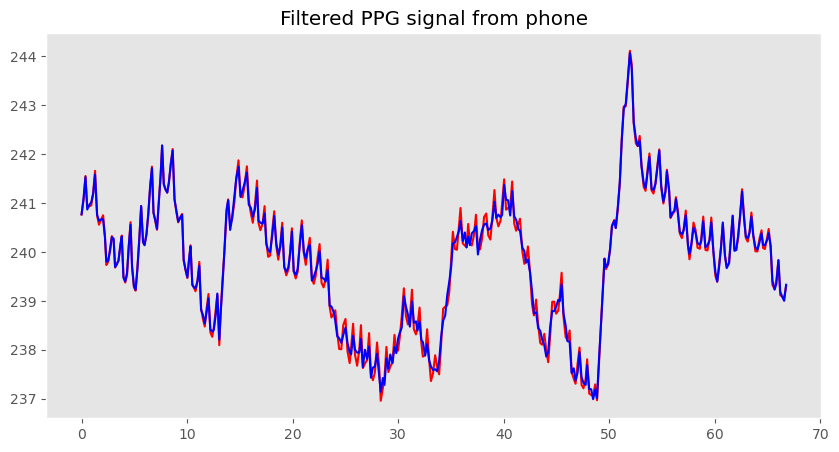

In [356]:
# FILL IN CODE to plot original and filtered signals.
plt.figure(figsize=(10,5))
plt.plot(timestamps, signal, 'r-',label='Original PPG', color='red')
plt.plot(timestamps, smoothed_signal, 'r-',label='Smoothed PPG', color='blue')
plt.title("Filtered PPG signal from phone")
pl.grid()
pl.show()

### 2.2 Use lowpass filter to remove residual high frequency noise

The low pass filter is used to remove any residual heart rate signal since the notch filter may not remove all of it. Other sources of high frequency noise are also removed.

**ASSIGNMENT:** Implement a lowpass filter and apply it to the notch-filtered signal. You will need to adjust the parameters as appropriate. Plot the original signal (before application of notch filter) and the notch+lowpass filtered signal. You may compare with the sample graph in the assignment instructions to adjust filter parameters (note that the resultant signal will vary with the estimated heartrate, since that was a parameter in the notch filter).

C:\Users\Default.DESKTOP-8HD5MR5\AppData\Local\Temp\ipykernel_12184\158066467.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(timestamps, filtered_signal, 'r-',label='Smoothed PPG', color='blue')


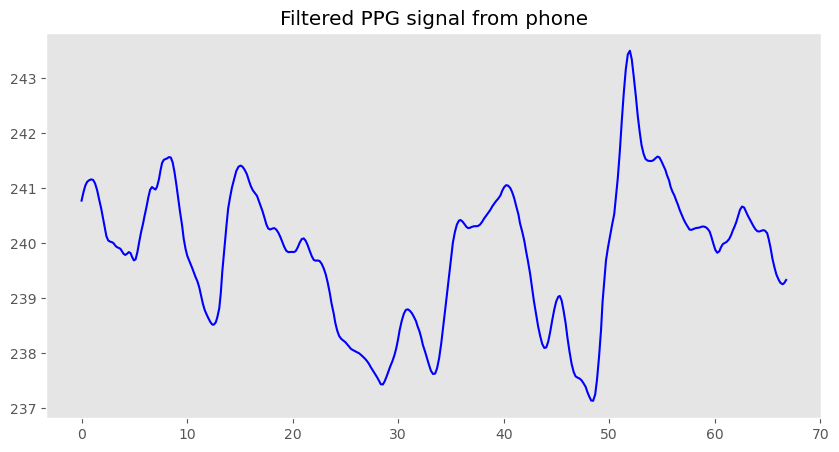

In [357]:
# FILL IN CODE to apply lowpass filter
# Define the cutoff frequency for the high-pass filter
cutoff_freq = 0.21  # Adjust this value as needed

# Design the high-pass filter
b, a = butter(2, cutoff_freq, 'low')

# Apply the filter to the signal
filtered_signal = filtfilt(b, a, smoothed_signal)

plt.figure(figsize=(10,5))
plt.plot(timestamps, filtered_signal, 'r-',label='Smoothed PPG', color='blue')
plt.title("Filtered PPG signal from phone")
pl.grid()
pl.show()

### 2.3 Estimating breathing rate

The final step is to estimate the breathing rate. Note that the signal has a wandering baseline, so you need to choose your estimation algorithm accordingly. Do not expect to see a very clean breathing signal - you should expect to see something noisy like this.

<img src="figures/breathing.png" width=500>

**ASSIGNMENT:** Estimate the breathing rate from the highpass-filtered signal from the previous step. Also plot your filtered signal with markers at the points determined to be breaths by your algorithm. Print the estimated breathing rate.

C:\Users\Default.DESKTOP-8HD5MR5\AppData\Local\Temp\ipykernel_12184\3490170114.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(timestamps, filtered_signal, 'r-',label='Smoothed PPG', color='blue')
C:\Users\Default.DESKTOP-8HD5MR5\AppData\Local\Temp\ipykernel_12184\3490170114.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(timestamps[troughs], filtered_signal[troughs], 'ro', label='Troughs', color='green')


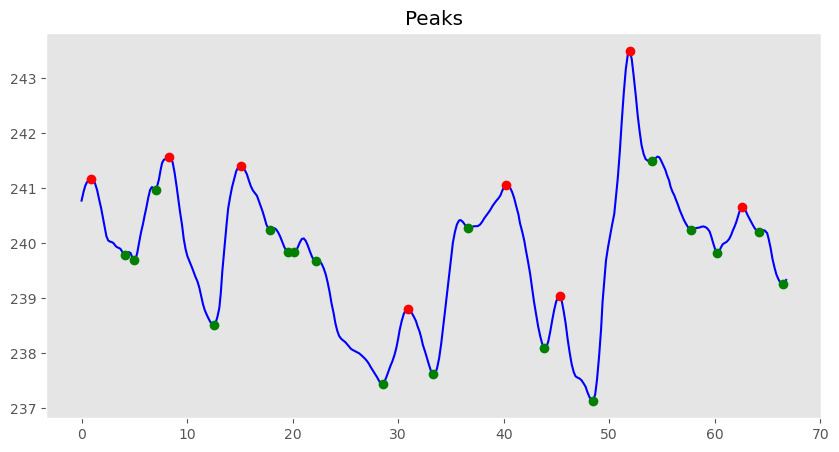

42.8571428571


In [358]:
# FILL IN CODE TO ESTIMATE BREATHING RATE AND PLOT RESULTS
#Find Peaks
peaks, _ = find_peaks(filtered_signal)
troughs, _ = find_peaks(-filtered_signal)

#Find average value
peak_values = filtered_signal[peaks]
average_peak = np.mean(peak_values)

trough_values = filtered_signal[troughs]
average_trough = np.mean(trough_values)

#Trim peak values
filtered_peaks = peaks[filtered_signal[peaks] >= average_peak]
filtered_troughs = troughs[filtered_signal[troughs] >= average_trough]

#Remove peaks if there is a trough nearby
window_size = 8  # Adjust this window size as needed
final_peaks = []
for peak in peaks:
    # Check if there is a trough within the window around the peak
    if np.any(np.abs(troughs - peak) < window_size):
        continue  # Skip this peak if a nearby trough is found
    final_peaks.append(peak)

# Plot the data and peaks
plt.figure(figsize=(10,5))
plt.plot(timestamps, filtered_signal, 'r-',label='Smoothed PPG', color='blue')
plt.plot(timestamps[final_peaks], filtered_signal[final_peaks], 'ro', label='Peaks')
plt.plot(timestamps[troughs], filtered_signal[troughs], 'ro', label='Troughs', color='green')
plt.title("Peaks")
pl.grid()
pl.show()

#(abandoned)
#final_peaks = np.concatenate((final_peaks, troughs))

# Count transitions from peaks to troughs
#transition_counter = 0
#for i in range(len(final_peaks) - 1):
#    if final_peaks[i] in filtered_peaks and final_peaks[i+1] in filtered_troughs:
#        transition_counter += 1


#Estimated breath rate
final_peaks = np.array(final_peaks)

z_scores = (final_peaks - np.mean(final_peaks))  / np.std(final_peaks)
# Define threshold for outliers
threshold = 1

# Find outliers
outliers = final_peaks[np.abs(z_scores) > threshold]

#Givin a 70 miliseconds sample
breath_rate = len(outliers) * 14.2857142857

#Final Result
print(breath_rate)

**NOTE:** Once you complete the assignment, click on Kernel > Restart & run all. Make sure all your code runs without errors and the plots and print statements are properly visible. Then save the notebook, add your changes to Git and commit and push before the deadline.